In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train=pd.read_csv('/content/drive/MyDrive/signate/コンペ　診断データを使った糖尿病発症予測/train.csv')
test=pd.read_csv('/content/drive/MyDrive/signate/コンペ　診断データを使った糖尿病発症予測/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/signate/コンペ　診断データを使った糖尿病発症予測/sample_submit.csv', header=None)

In [3]:
train.dtypes

index                         int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
train.isnull().sum()

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
test.isnull().sum()

index                       0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [6]:
train.shape

(3000, 10)

In [7]:
train = train[train['BMI'] > 20]

In [8]:
train.corr()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
index,1.000000,0.003192,0.036430,0.036689,-0.004005,0.004757,-0.018747,0.029531,0.013144,0.013315
Pregnancies,0.003192,1.000000,0.066708,-0.009344,0.002842,-0.034881,0.006415,-0.025329,0.418861,0.201380
Glucose,0.036430,0.066708,1.000000,-0.000126,0.023350,0.010035,0.013518,0.052577,0.033036,0.066180
BloodPressure,0.036689,-0.009344,-0.000126,1.000000,0.022709,0.035376,0.104313,0.088343,0.026731,0.051754
SkinThickness,-0.004005,0.002842,0.023350,0.022709,1.000000,0.167207,0.073087,0.142315,0.029925,0.001857
Insulin,0.004757,-0.034881,0.010035,0.035376,0.167207,1.000000,0.182359,0.217922,0.047157,0.079229
BMI,-0.018747,0.006415,0.013518,0.104313,0.073087,0.182359,1.000000,0.062342,0.098051,0.278595
DiabetesPedigreeFunction,0.029531,-0.025329,0.052577,0.088343,0.142315,0.217922,0.062342,1.000000,0.071262,0.095907
Age,0.013144,0.418861,0.033036,0.026731,0.029925,0.047157,0.098051,0.071262,1.000000,0.269034
Outcome,0.013315,0.201380,0.066180,0.051754,0.001857,0.079229,0.278595,0.095907,0.269034,1.000000


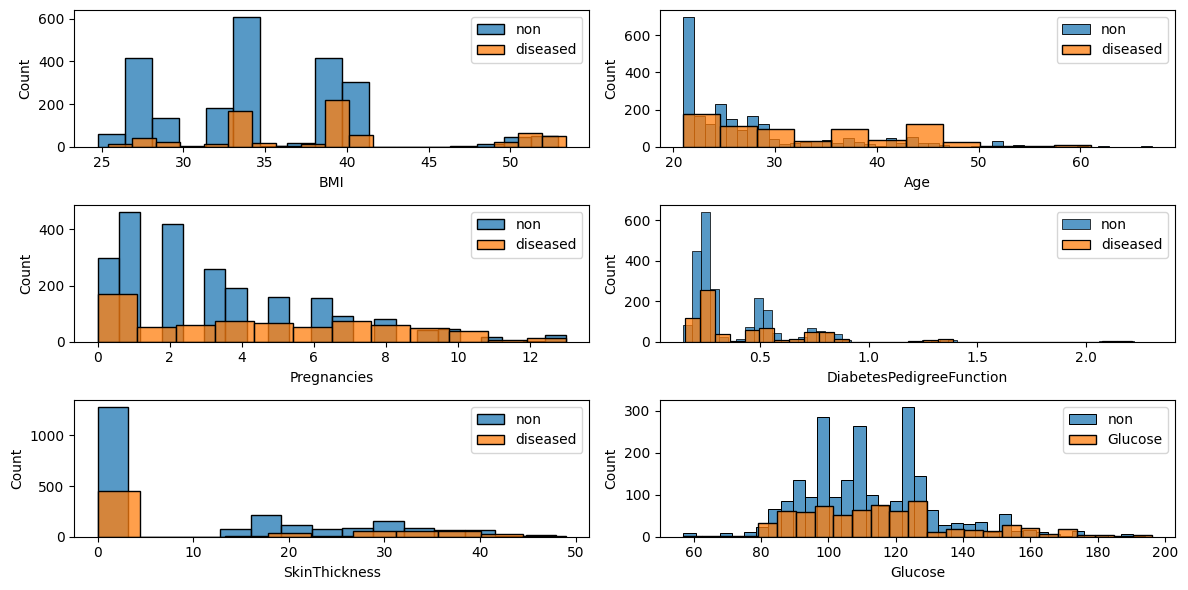

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_BMI_non = train[train['Outcome'] == 0]["BMI"]
df_BMI_diseased = train[train['Outcome'] == 1]["BMI"]
df_Age_non = train[train['Outcome'] == 0]["Age"]
df_Age_diseased = train[train['Outcome'] == 1]["Age"]
df_Pregnancies_non = train[train['Outcome'] == 0]["Pregnancies"]
df_Pregnancies_diseased = train[train['Outcome'] == 1]["Pregnancies"]
df_DiabetesPedigreeFunction_non = train[train['Outcome'] == 0]["DiabetesPedigreeFunction"]
df_DiabetesPedigreeFunction_diseased = train[train['Outcome'] == 1]["DiabetesPedigreeFunction"]
df_SkinThickness_non = train[train['Outcome'] == 0]["SkinThickness"]
df_SkinThickness_diseased = train[train['Outcome'] == 1]["SkinThickness"]
df_Glucose_non = train[train['Outcome'] == 0]["Glucose"]
df_Glucose_diseased = train[train['Outcome'] == 1]["Glucose"]
plt.figure(figsize=(12, 6))

plt.subplot(3, 2, 1)
sns.histplot(df_BMI_non)
sns.histplot(df_BMI_diseased)
plt.legend(labels=["non", "diseased"], loc='upper right')

plt.subplot(3, 2, 2)
sns.histplot(df_Age_non)
sns.histplot(df_Age_diseased)
plt.legend(labels=["non", "diseased"], loc='upper right')

plt.subplot(3, 2, 3)
sns.histplot(df_Pregnancies_non)
sns.histplot(df_Pregnancies_diseased)
plt.legend(labels=["non", "diseased"], loc='upper right')

plt.subplot(3, 2, 4)
sns.histplot(df_DiabetesPedigreeFunction_non)
sns.histplot(df_DiabetesPedigreeFunction_diseased)
plt.legend(labels=["non", "diseased"], loc='upper right')

plt.subplot(3, 2, 5)
sns.histplot(df_SkinThickness_non)
sns.histplot(df_SkinThickness_diseased)
plt.legend(labels=["non", "diseased"], loc='upper right')

plt.subplot(3, 2, 6)
sns.histplot(df_Glucose_non)
sns.histplot(df_Glucose_diseased)
plt.legend(labels=["non", "Glucose"], loc='upper right')

plt.tight_layout()
plt.show()

In [10]:
train['BMI_Age'] = train['BMI'] * train['Age']
df_BMI_Age_non = train[train['Outcome'] == 0]["BMI_Age"]
df_BMI_Age_diseased = train[train['Outcome'] == 1]["BMI_Age"]

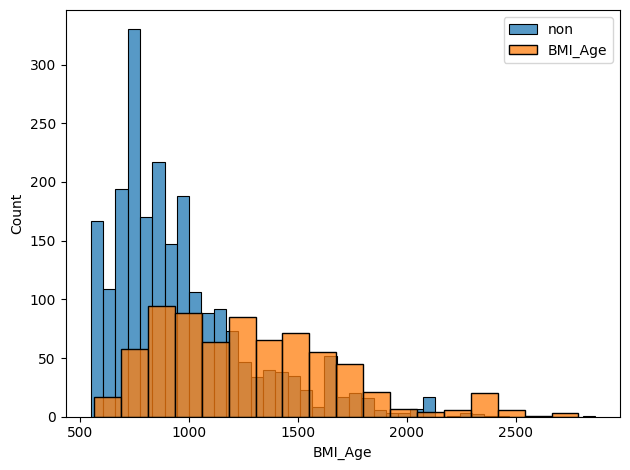

In [11]:
sns.histplot(df_BMI_Age_non)
sns.histplot(df_BMI_Age_diseased)
plt.legend(labels=["non", "BMI_Age"], loc='upper right')
plt.tight_layout()
plt.show()

In [12]:
y=train['Outcome']
train.drop(['Outcome','Insulin','Glucose','index','SkinThickness','BloodPressure'], axis=1, inplace=True)
test.drop(['index',	'Insulin','Glucose','SkinThickness','BloodPressure'], axis=1, inplace=True)
df = pd.concat((train, test)).reset_index(drop=True)

In [13]:
df['BMI_Age']=df['BMI']*df['Age']

In [14]:
train.shape

(2966, 5)

In [15]:
# BMIのbinsとダミー変数化
bins_BMI = [0, 25, 30, 35, 40, 45, 50, 55]
X_cut_BMI, bin_indice_BMI = pd.cut(df["BMI"], bins=bins_BMI, retbins=True, labels=False)
X_dummies_BMI = pd.get_dummies(X_cut_BMI, prefix='BMI')
df = pd.concat([df, X_dummies_BMI], axis=1)

# Ageのbinsとダミー変数化
bins_Age = [0, 20, 30, 40, 50, 60, 70]
X_cut_Age, bin_indice_Age = pd.cut(df["Age"], bins=bins_Age, retbins=True, labels=False)
X_dummies_Age = pd.get_dummies(X_cut_Age, prefix='Age')
df = pd.concat([df, X_dummies_Age], axis=1)

# Pregnanciesのbinsとダミー変数化
bins_Pregnancies = [0, 2, 4, 6, 8, 10, 12, 14]
X_cut_Pregnancies, bin_indice_Pregnancies = pd.cut(df["Pregnancies"], bins=bins_Pregnancies, retbins=True, labels=False)
X_dummies_Pregnancies = pd.get_dummies(X_cut_Pregnancies, prefix='Pregnancies')
df = pd.concat([df, X_dummies_Pregnancies], axis=1)

# diabetesのbinsとダミー変数化
bins_diabetes = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
X_cut_diabetes, bin_indice_diabetes = pd.cut(df["DiabetesPedigreeFunction"], bins=bins_diabetes, retbins=True, labels=False)
X_dummies_diabetes = pd.get_dummies(X_cut_diabetes, prefix='diabetes')
df = pd.concat([df, X_dummies_diabetes], axis=1)

bins_BMI_Age = [500,750,1000,1250,1500,1750,2000]
X_cut_BMI_Age, bin_indice_BMI_Age = pd.cut(df["BMI_Age"], bins=bins_BMI_Age, retbins=True, labels=False)
X_dummies_BMI_Age = pd.get_dummies(X_cut_BMI_Age, prefix='BMI_Age')
df = pd.concat([df, X_dummies_BMI_Age], axis=1)
# 元のカラムを削除
df.drop(columns=['BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction','BMI_Age'], inplace=True)


In [16]:
df.dtypes

BMI_0              uint8
BMI_1              uint8
BMI_2              uint8
BMI_3              uint8
BMI_4              uint8
BMI_5              uint8
BMI_6              uint8
Age_1              uint8
Age_2              uint8
Age_3              uint8
Age_4              uint8
Age_5              uint8
Pregnancies_0.0    uint8
Pregnancies_1.0    uint8
Pregnancies_2.0    uint8
Pregnancies_3.0    uint8
Pregnancies_4.0    uint8
Pregnancies_5.0    uint8
Pregnancies_6.0    uint8
diabetes_0         uint8
diabetes_1         uint8
diabetes_2         uint8
diabetes_3         uint8
diabetes_4         uint8
BMI_Age_0.0        uint8
BMI_Age_1.0        uint8
BMI_Age_2.0        uint8
BMI_Age_3.0        uint8
BMI_Age_4.0        uint8
BMI_Age_5.0        uint8
dtype: object

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [18]:
# 多項式・交互作用特徴量
polynomial = PolynomialFeatures(degree=2, include_bias=False)
polynomial_arr = polynomial.fit_transform(df)
X_polynomial = pd.DataFrame(polynomial_arr, columns=["poly" + str(x) for x in range(polynomial_arr.shape[1])])
X_polynomial.head()

,poly0,poly1,poly2,poly3,poly4,poly5,poly6,poly7,poly8,poly9,...,poly485,poly486,poly487,poly488,poly489,poly490,poly491,poly492,poly493,poly494
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# 組み込み法のモデル、閾値の指定
fs_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=0)
fs_threshold = "mean"
# 組み込み法モデルの初期化
selector = SelectFromModel(fs_model, threshold=fs_threshold)

train_polynomial =  X_polynomial.head(2966)
test_polynomial = X_polynomial.iloc[2966:, :]
# 特徴量選択の実行
selector.fit(train_polynomial, y)
mask = selector.get_support()

# 選択された特徴量だけのサンプル取得
train_polynomial_masked = train_polynomial.loc[:, mask]
test_polynomial_masked = test_polynomial.loc[:, mask]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# パラメータグリッドの定義
param_grid = {'C': [0.1, 1, 10, 100]}

# ロジスティック回帰モデルのインスタンス化
model = LogisticRegression()

# グリッドサーチの実行
grid_search = GridSearchCV(model, param_grid, cv=5)
x_train, x_test, y_train, y_test = train_test_split(train_polynomial_masked, y, test_size = 0.2)
grid_search.fit(x_train, y_train)

# 最適なモデルの取得
best_model = grid_search.best_estimator_
y_pred=best_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
from sklearn.metrics import accuracy_score
print('accuracy_score:', accuracy_score(y_test, y_pred))

accuracy_score: 0.7828282828282829


In [22]:
#モデルの学習・予測
model = LogisticRegression()
model.fit(train_polynomial_masked, y)
y_pred = model.predict(test_polynomial_masked)

In [23]:
y_pred_series = pd.Series(y_pred)
result_df = pd.concat([sample.iloc[:, 0],y_pred_series], axis=1)
result_df.to_csv('/content/drive/MyDrive/signate/コンペ　診断データを使った糖尿病発症予測/submit.csv', header=False, index=False)